# <center> **SPECIFIC PLOTS**

## **1. WORD CLOUD**

Description:
- Word Cloud generator in Python

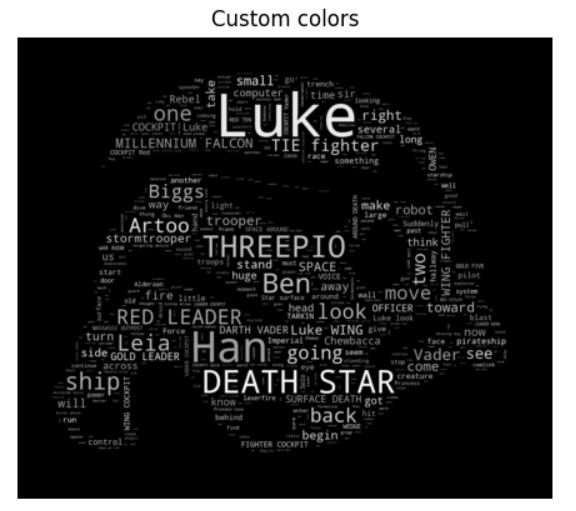

Doc: https://amueller.github.io/word_cloud/index.html

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 999.5, 599.5, -0.5)

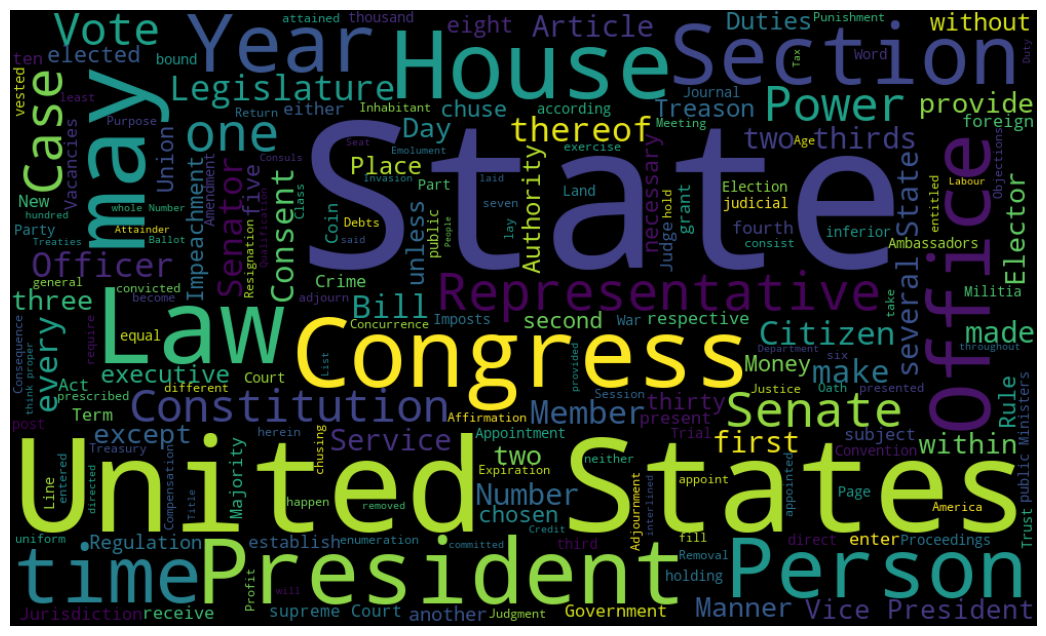

In [4]:
import os
from os import path
os.chdir(r'C:\\Users\\melanie.vercaempt\\Documents\\Code\\train-keyrus-academy-python\\data-viz')

text = open('data/constitution.txt').read()
wordcloud = WordCloud(max_font_size=200, width = 1000, height=600).generate(text)

# Display the generated image with matplotlib
fig, ax = plt.subplots(figsize=(18,8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [5]:
text

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure domestic Tranquility, provide for the common defence, promote the general Welfare, and secure the Blessings of Liberty to ourselves and our Posterity, do ordain and establish this Constitution for the United States of America.\n\nArticle. I.\n\nSection. 1.\n\nAll legislative Powers herein granted shall be vested in a Congress of the United States, which shall consist of a Senate and House of Representatives.\n\nSection. 2.\n\nThe House of Representatives shall be composed of Members chosen every second Year by the People of the several States, and the Electors in each State shall have the Qualifications requisite for Electors of the most numerous Branch of the State Legislature.\n\nNo Person shall be a Representative who shall not have attained to the Age of twenty five Years, and been seven Years a Citizen of the United States, and who shall not, when elected, be an Inhabitant of that

## **2. TEXT: SCATTERPLOT**

Description:
- A tool for finding distinguishing terms in small-to-medium-sized corpora, and presenting them in a sexy, interactive scatter plot with non-overlapping term labels. Exploratory data analysis just got more fun.

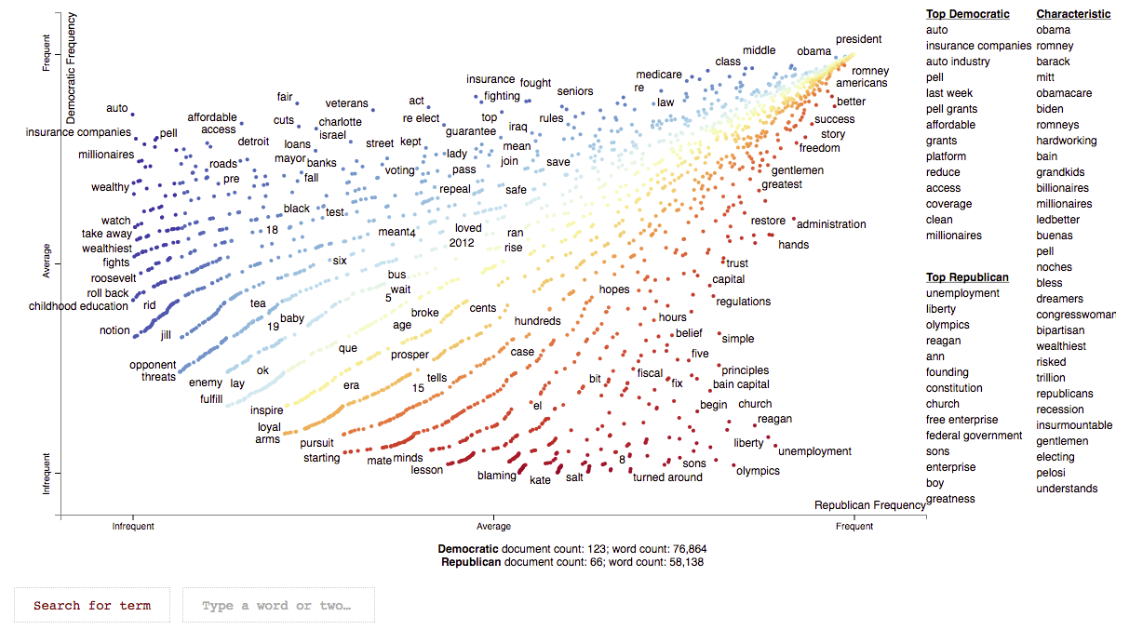

Doc: https://github.com/JasonKessler/scattertext

In [5]:
# imports
import scattertext as st
import spacy

In [7]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()
nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(convention_df, 
                             category_col='party', 
                             text_col='text',
                             nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['obama', 'romney', 'barack', 'mitt', 'obamacare', 'biden', 'romneys', 'hardworking', 'bailouts', 'autoworkers']


In [9]:
# Democrats
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Democratic Score'] = corpus.get_scaled_f_scores('democrat')
print(list(term_freq_df.sort_values(by='Democratic Score', ascending=False).index[:10]))

['middle class', 'forward', 'class', 'middle', 'the middle', 'pay', 'medicare', 'education', 'health', 'president obama']


In [10]:
# Republicans
term_freq_df['Republican Score'] = corpus.get_scaled_f_scores('republican')
print(list(term_freq_df.sort_values(by='Republican Score', ascending=False).index[:10]))

['government', 'administration', 'business', 'can do', 'success', 'story', 'unemployment', 'freedom', 'paul', 'do better']


In [11]:
html = st.produce_scattertext_explorer(
    corpus,
    category='democrat',
    category_name='Democratic',
    not_category_name='Republican',
    width_in_pixels=1000,
    metadata=convention_df['speaker'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'));

## **3. MISSINGNO**

Description:
- Missing data visualization module for Python

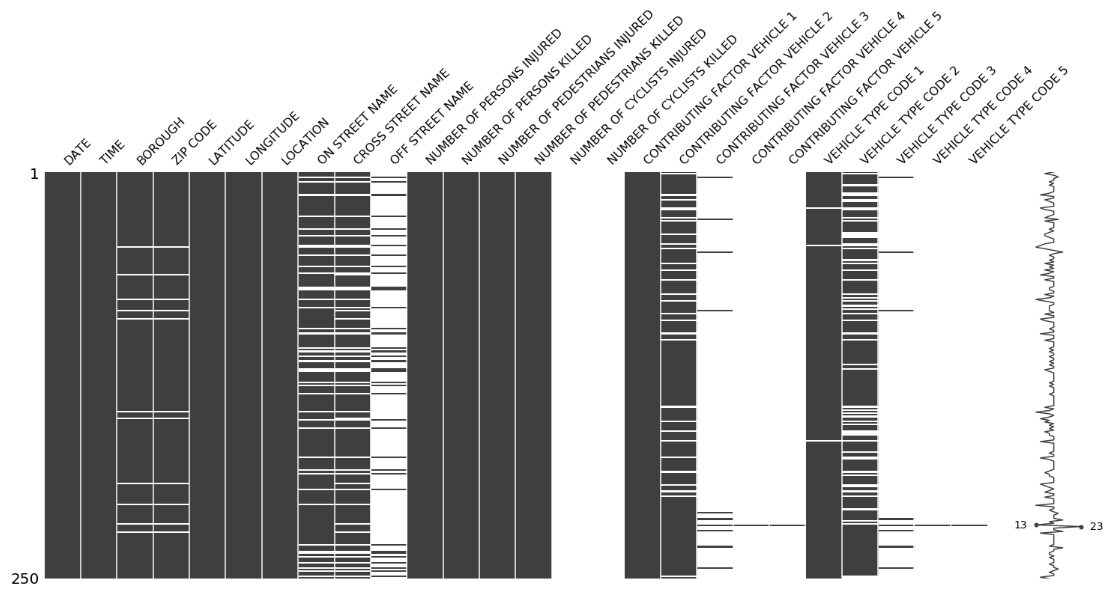

Doc: https://github.com/ResidentMario/missingno

In [14]:
# imports
import missingno as msno
import numpy as np
import pandas as pd

In [15]:
# data
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
collisions = collisions.replace("nan", np.nan)

<AxesSubplot:>

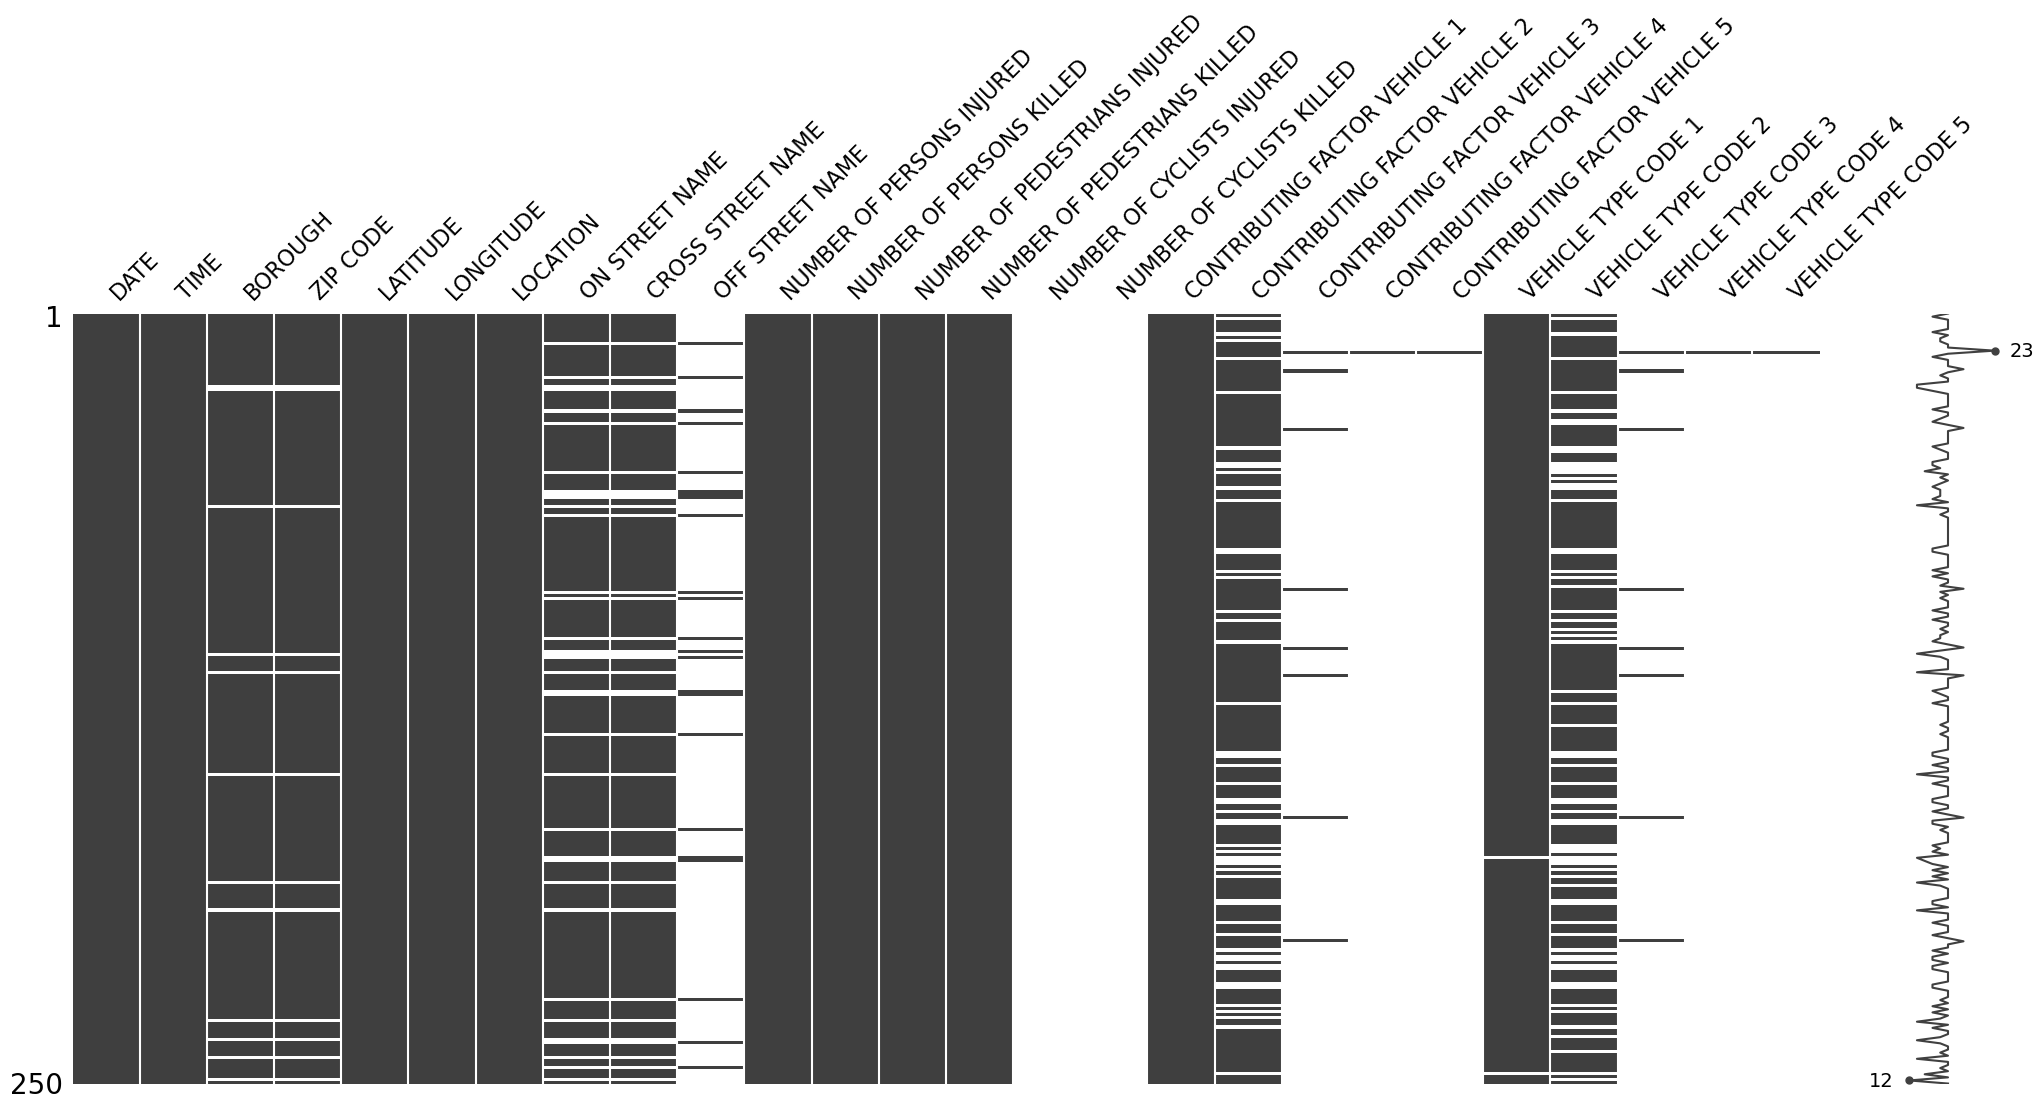

In [16]:
# MISSINGNO - Matrix plot
msno.matrix(collisions.sample(250))

<AxesSubplot:>

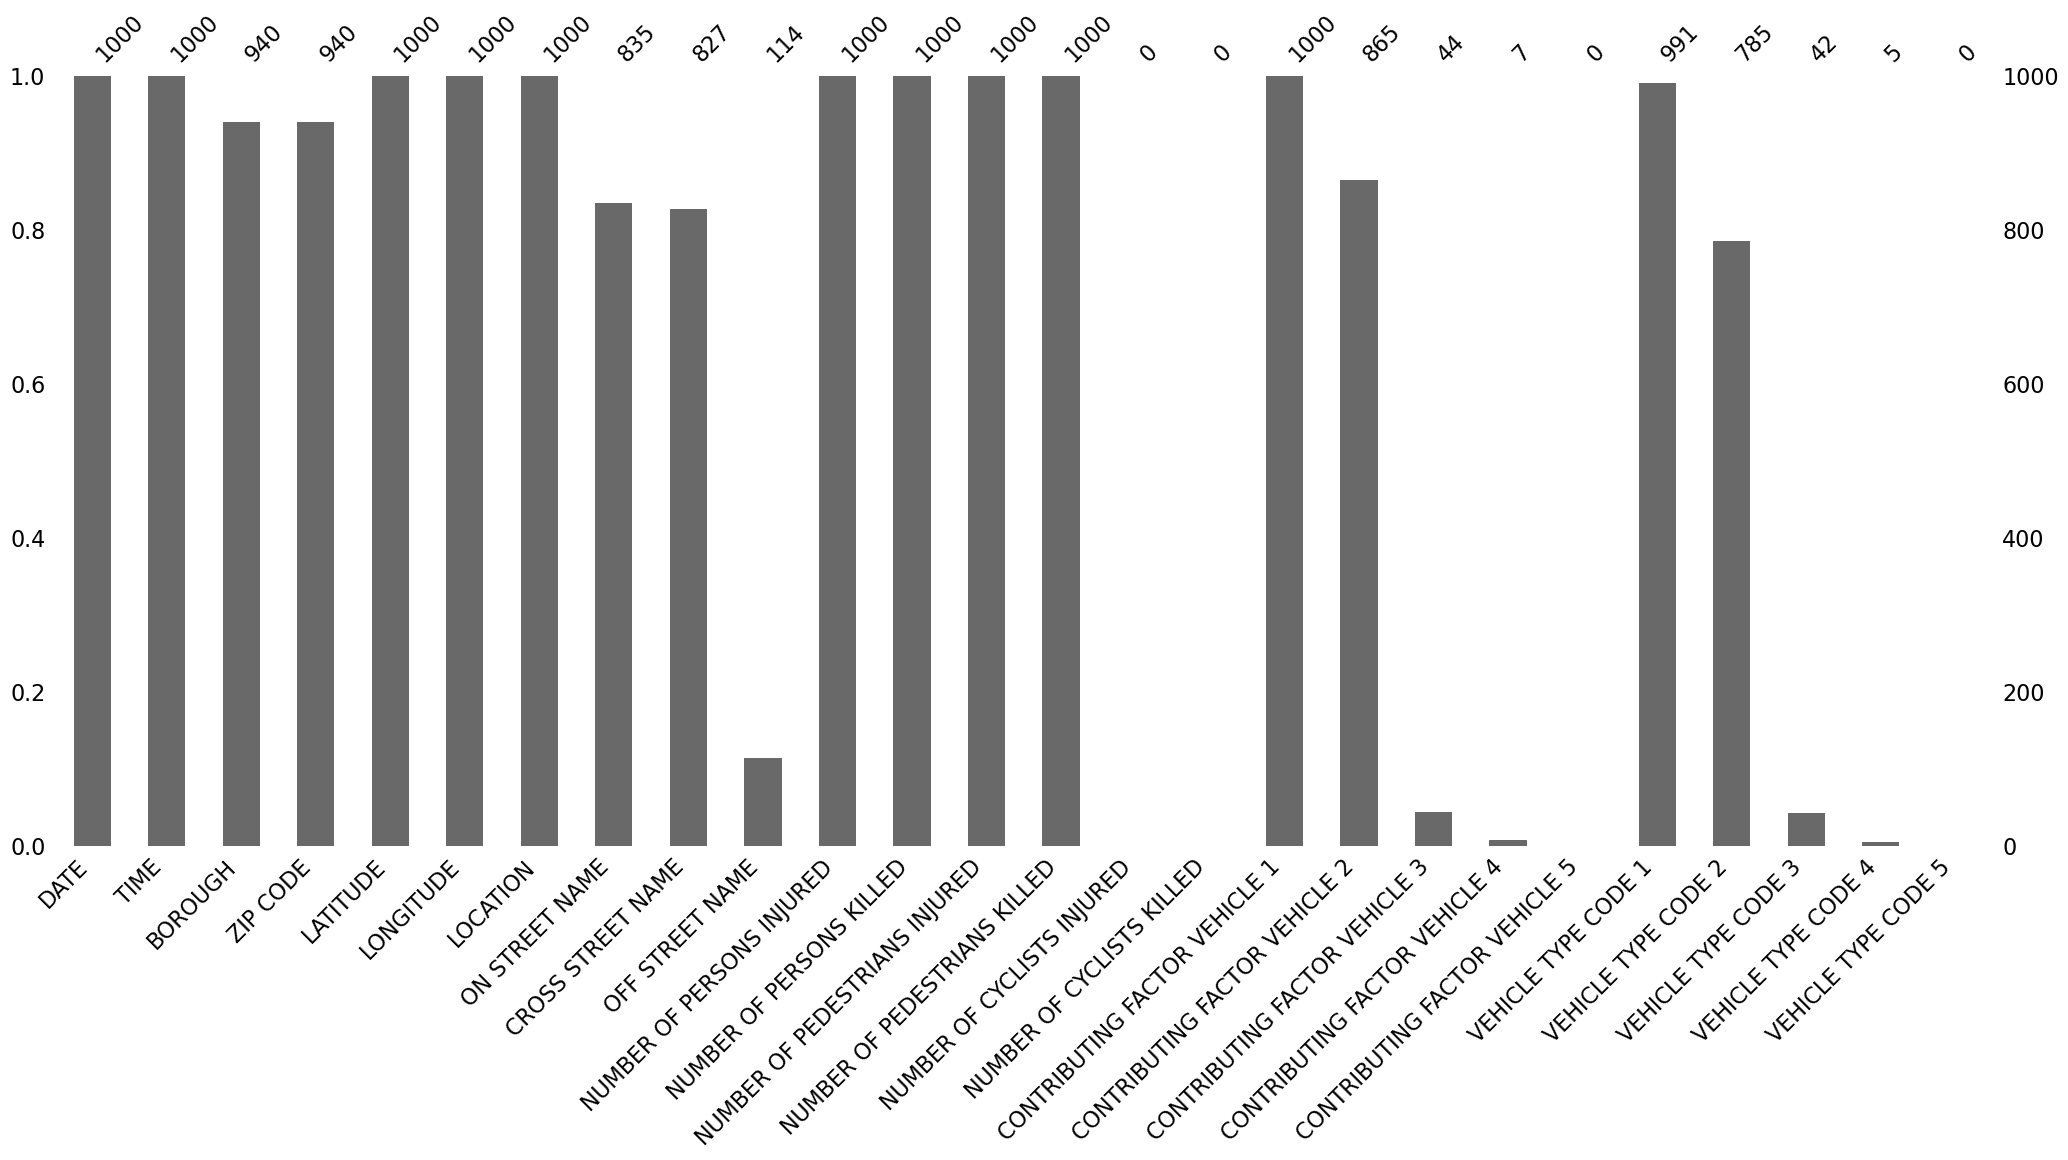

In [17]:
# MISSINGNO - Bar chart
msno.bar(collisions.sample(1000))

<AxesSubplot:>

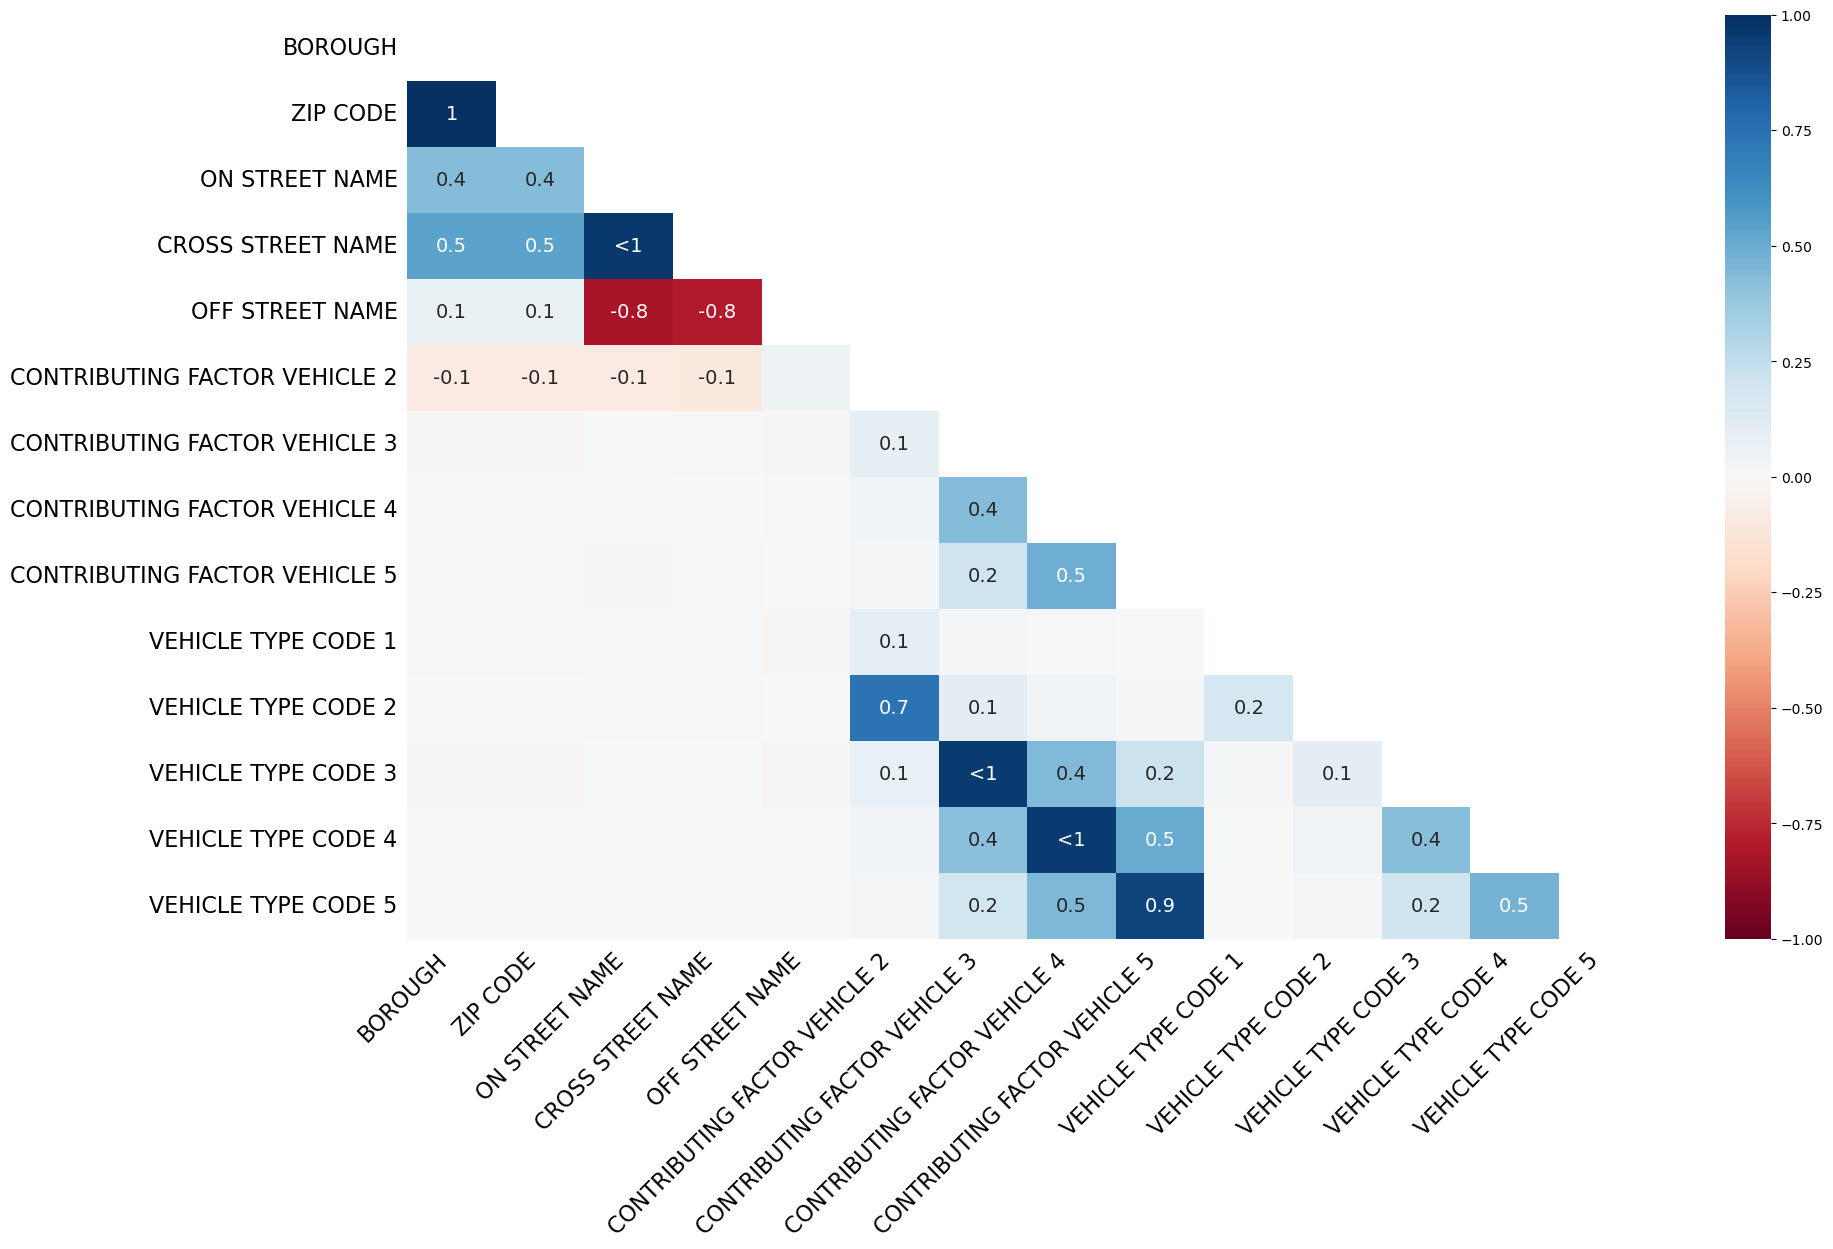

In [18]:
# MISSINGNO - Heatmap
msno.heatmap(collisions)

<AxesSubplot:>

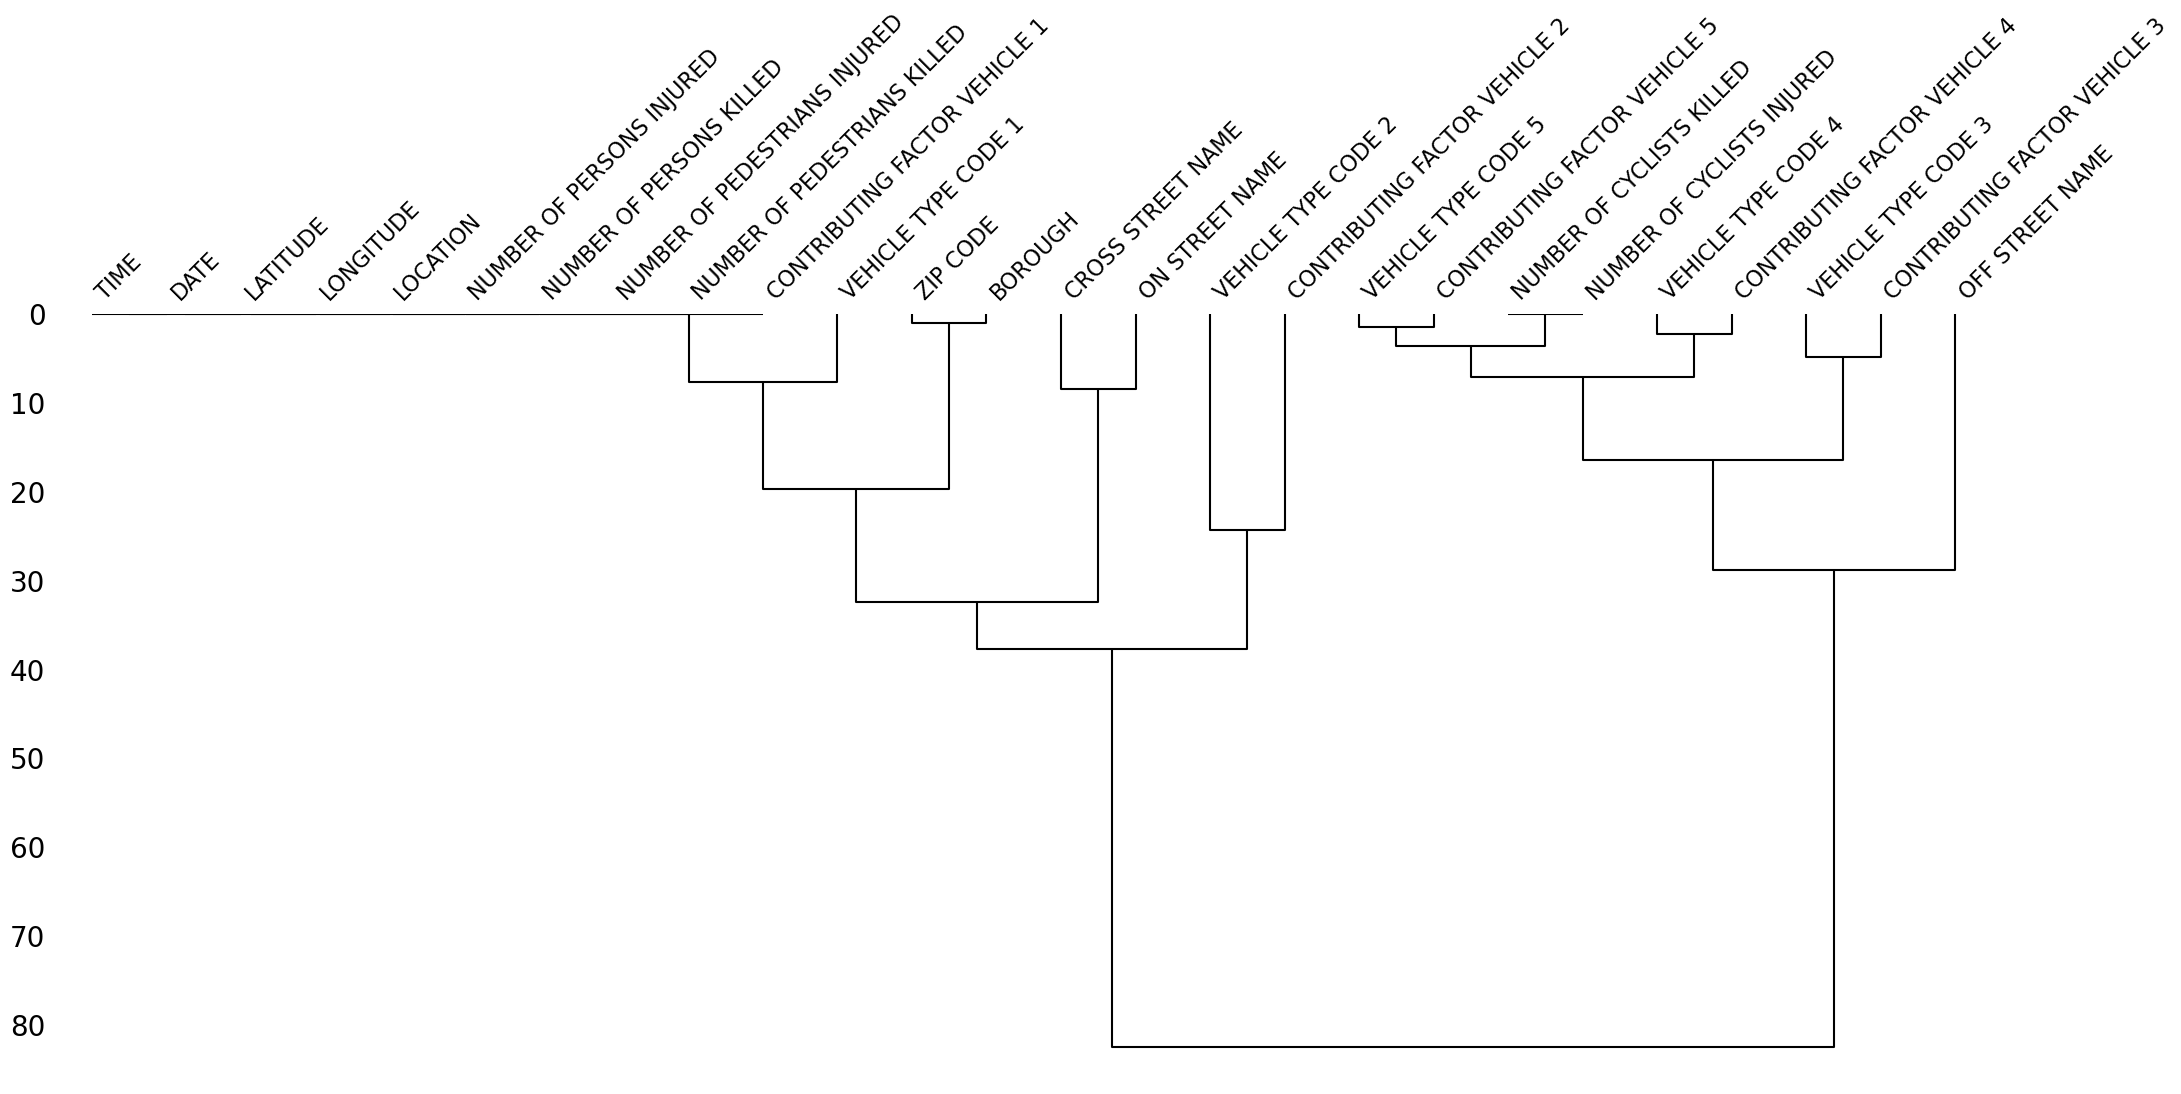

In [19]:
# MISSINGNO - Dendogram
msno.dendrogram(collisions)